In [1]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Classification to predict - 'BiasInfluentialFactor'

In [2]:
#loading data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
test1 = test.copy()
train1 = train.copy()

In [4]:
train1['BiasInfluentialFactor'].fillna('NA', inplace=True) 
train1.drop(['EmpID','EmpName'],axis=1, inplace=True)
test2 = test1.drop(['EmpID','EmpName'],axis=1)

In [5]:
#num = [f for f in train1.columns if train.dtypes[f] != 'object']
#nd = pd.melt(train1, value_vars = num)
#n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
#n1 = n1.map(sns.distplot, 'value')
#n1

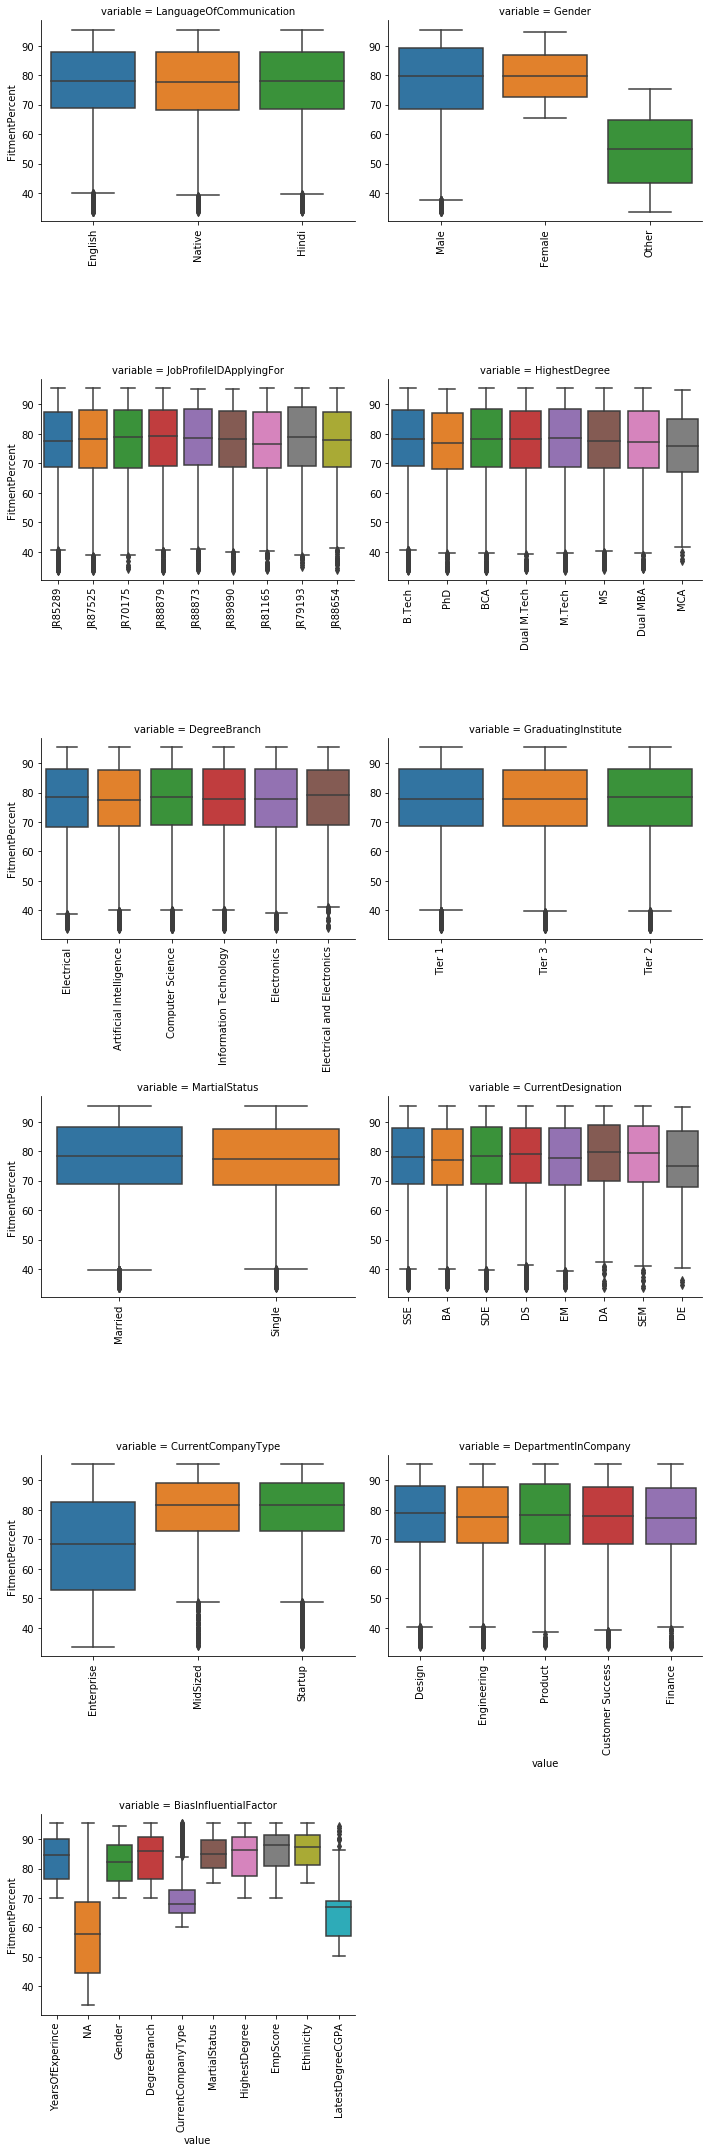

In [6]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train1.columns if train.dtypes[f] == 'object']

p = pd.melt(train1, id_vars='FitmentPercent', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','FitmentPercent')
g

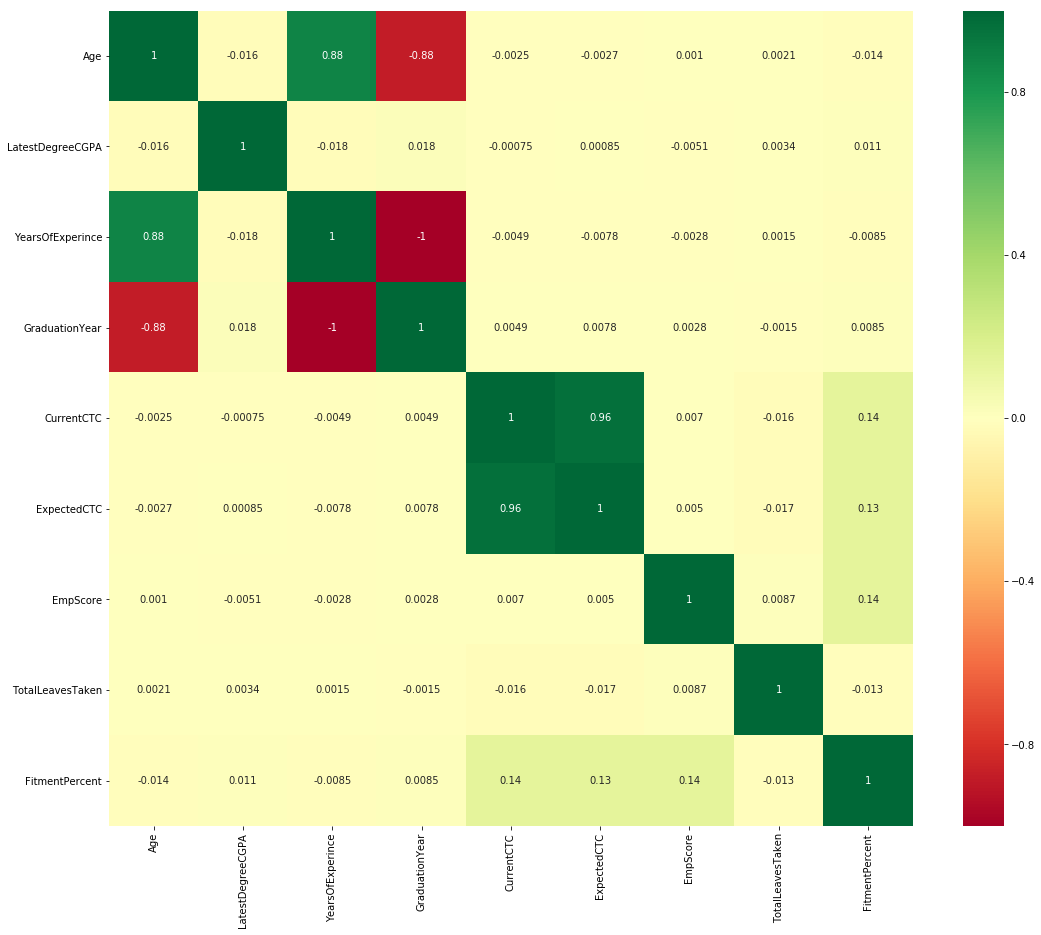

In [7]:
corrmat=train1.corr() #correlation of each with other attribute in the dataset
top_corr_features=corrmat.index
plt.figure(figsize=(18,15))
k=sns.heatmap(train1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
from sklearn import preprocessing

for x in train1.iloc[:,:-2].columns:
    if train1[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train1[x].values))
        train1[x] = lbl.transform(list(train1[x].values))

for x in test2.columns:
    if test2[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test2[x].values))
        test2[x] = lbl.transform(list(test2[x].values))

In [9]:
x_train1=train1.iloc[:,:-2]
y_train1=train1.iloc[:,-2]

In [10]:
x_train_scaled1 = preprocessing.scale(x_train1)
x_test_scaled1 = preprocessing.scale(test2)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model1 = RandomForestClassifier()
# fit the model on the whole dataset
model1.fit(x_train_scaled1, y_train1)
# make a single prediction
y_pred_R = model1.predict(x_test_scaled1)
y_pred_R

array(['CurrentCompanyType', 'DegreeBranch', 'MartialStatus', ...,
       'DegreeBranch', 'NA', 'NA'], dtype=object)

In [13]:
test1['BiasInfluentialFactor'] = y_pred_R
test1.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,...,2016,27,34,Single,4,SDE,Enterprise,Finance,18,CurrentCompanyType
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,...,2009,29,33,Married,4,EM,Enterprise,Engineering,8,DegreeBranch
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,...,2019,18,25,Married,3,SDE,Startup,Engineering,18,MartialStatus
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,...,2010,7,12,Single,5,DS,Enterprise,Product,17,NA
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,...,2015,22,32,Married,4,SDE,Startup,Engineering,9,Gender


### Forecast FitmentPercent

In [14]:
train1.columns

Index(['LanguageOfCommunication', 'Age', 'Gender', 'JobProfileIDApplyingFor',
       'HighestDegree', 'DegreeBranch', 'GraduatingInstitute',
       'LatestDegreeCGPA', 'YearsOfExperince', 'GraduationYear', 'CurrentCTC',
       'ExpectedCTC', 'MartialStatus', 'EmpScore', 'CurrentDesignation',
       'CurrentCompanyType', 'DepartmentInCompany', 'TotalLeavesTaken',
       'BiasInfluentialFactor', 'FitmentPercent'],
      dtype='object')

In [15]:
train1 = pd.get_dummies(train1, prefix='d_', columns=['LanguageOfCommunication', 'Gender', 'JobProfileIDApplyingFor', 'HighestDegree', \
                                             'DegreeBranch', 'GraduatingInstitute', 'MartialStatus', 'CurrentDesignation', \
                                             'CurrentCompanyType', 'DepartmentInCompany', 'TotalLeavesTaken', \
                                             'BiasInfluentialFactor'])
train1.head()

,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,FitmentPercent,d__0,d__1,...,d__CurrentCompanyType,d__DegreeBranch,d__EmpScore,d__Ethinicity,d__Gender,d__HighestDegree,d__LatestDegreeCGPA,d__MartialStatus,d__NA,d__YearsOfExperince
0,35,7,12,2009,21,26,5,95.40,1,0,...,0,0,0,0,0,0,0,0,0,1
1,26,7,3,2018,15,19,5,67.09,1,0,...,0,0,0,0,0,0,0,0,1,0
2,36,6,6,2015,15,24,5,91.26,1,0,...,0,0,0,0,1,0,0,0,0,0
3,29,5,6,2015,16,24,5,72.29,1,0,...,0,0,0,0,1,0,0,0,0,0
4,25,8,2,2019,24,32,5,86.34,1,0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
x_test_final = pd.get_dummies(test1.iloc[:,2:], prefix='d_', columns=['LanguageOfCommunication', 'Gender', 'JobProfileIDApplyingFor', 'HighestDegree', \
                                             'DegreeBranch', 'GraduatingInstitute', 'MartialStatus', 'CurrentDesignation', \
                                             'CurrentCompanyType', 'DepartmentInCompany', 'TotalLeavesTaken', \
                                             'BiasInfluentialFactor'])
x_test_final.head()

,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,d__English,d__Hindi,d__Native,...,d__CurrentCompanyType,d__DegreeBranch,d__EmpScore,d__Ethinicity,d__Gender,d__HighestDegree,d__LatestDegreeCGPA,d__MartialStatus,d__NA,d__YearsOfExperince
0,35,5,5,2016,27,34,4,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,35,9,12,2009,29,33,4,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,28,9,2,2019,18,25,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,37,8,11,2010,7,12,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,36,7,6,2015,22,32,4,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
y_train = train1.loc[:,'FitmentPercent']
x_train = train1.drop(columns='FitmentPercent')

In [18]:
y_train = np.array(y_train)
x_train = np.array(x_train)
x_test_final = np.array(x_test_final)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.1) #split the dataset into training and test data set

In [20]:
x_train = preprocessing.scale(x_train)
x_test_final = preprocessing.scale(x_test_final)

In [28]:
import tensorflow as tf

In [37]:
import keras
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import RMSprop 
from keras.callbacks import EarlyStopping 

In [43]:
#create Model
#define base model
model = Sequential()
model.add(Dense(20, input_dim=84, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                1700      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(
   X_train, 
   Y_train,    
   batch_size=128, 
   epochs = 500, 
   verbose = 1, 
   validation_split = 0.2, 
   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20)]
)

Epoch 1/500
77/77 [==============================] - 0s 7ms/step - loss: 54.9674 - val_loss: 57.5835
Epoch 2/500
77/77 [==============================] - 0s 6ms/step - loss: 54.8765 - val_loss: 57.4138
Epoch 3/500
77/77 [==============================] - 0s 6ms/step - loss: 55.3962 - val_loss: 57.2553
Epoch 4/500
77/77 [==============================] - 0s 5ms/step - loss: 54.0686 - val_loss: 57.0397
Epoch 5/500
77/77 [==============================] - 0s 6ms/step - loss: 55.7755 - val_loss: 56.7617
Epoch 6/500
77/77 [==============================] - 0s 6ms/step - loss: 54.1721 - val_loss: 56.8896
Epoch 7/500
77/77 [==============================] - 0s 6ms/step - loss: 53.7814 - val_loss: 57.4563
Epoch 8/500
77/77 [==============================] - 0s 6ms/step - loss: 55.5930 - val_loss: 58.1150
Epoch 9/500
77/77 [==============================] - 0s 6ms/step - loss: 54.1731 - val_loss: 57.6838
Epoch 10/500
77/77 [==============================] - 1s 8ms/step - loss: 54.8707 - val_los

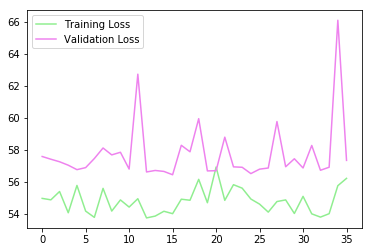

In [57]:
plt.plot(history.history["loss"], label="Training Loss",color='lightgreen')
plt.plot(history.history["val_loss"], label="Validation Loss",color='violet')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(Y_test, model.predict(X_test))
coefficient_of_dermination

0.7494314114871297

In [24]:
#make predictions and create the submission file 
kpred = np.round(model.predict(x_test_final), decimals=2)
test1['FitmentPercent'] = kpred
pred_df = test1[["EmpID", 'BiasInfluentialFactor', 'FitmentPercent']]
#pred_df.to_csv('gouranga_amazon_submission.csv', index=None)  # Save final submission into data
pred_df

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,CurrentCompanyType,0.060000
1,23568,DegreeBranch,0.050000
2,21490,MartialStatus,47.369999
3,8363,NA,0.060000
4,6165,Gender,20.549999
5,17679,NA,0.060000
6,9715,DegreeBranch,16.700001
7,12591,NA,0.040000
8,6140,NA,0.060000
9,21018,NA,0.050000
